In [1]:
!pip install nltk matplotlib wordcloud

In [3]:
!pip install textblob spacy

In [4]:
!pip install seaborn

In [5]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 114.4 MB/s eta 0:00:00m eta 0:00:010:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [6]:
!pip install gensim

In [7]:
import os
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from textblob import TextBlob
import spacy
from nltk import bigrams
from gensim import corpora, models
import numpy as np

In [8]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     /usr4/cs585bp/gitika/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /usr4/cs585bp/gitika/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
def preprocess_text(text):
    # basic preprocessing
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text.lower()

In [11]:
# word cloud
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud - {title}')
    plt.show()

In [13]:
# word freq bar chart
def generate_word_frequency_bar_chart(tokens, title):
    fdist = FreqDist(tokens)
    most_common = fdist.most_common(30)
    words, frequencies = zip(*most_common)
    print(most_common)
    
    plt.figure(figsize=(12, 6))
    plt.bar(words, frequencies)
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Word Frequency - {title}')
    plt.show()

In [14]:
# Sentiment Analysis
def perform_sentiment_analysis(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    return sentiment

In [15]:
def visualize_sentiment(sentiments, president_name):
    labels = ['Negative', 'Neutral', 'Positive']
    sentiment_values = [sum(sentiments < 0), sum(sentiments == 0), sum(sentiments > 0)]

    fig, ax = plt.subplots()
    ax.bar(labels, sentiment_values, color=['red', 'gray', 'green'])
    ax.set_ylabel('Number of Sentences')
    ax.set_title(f'Sentiment Distribution for {president_name}')

    plt.show()

In [16]:
# named entity recognition (NER)
def perform_ner(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)
    entities = [ent.text for ent in doc.ents]
    return entities

In [17]:
# Bigram freq
def generate_bigram_bar_chart(tokens, title):
    bigram_tokens = list(bigrams(tokens))
    fdist_bigram = FreqDist(bigram_tokens)
    most_common_bigram = fdist_bigram.most_common(30)
    bigram_labels = [' '.join(bigram) for bigram, _ in most_common_bigram]

    plt.figure(figsize=(12, 6))
    plt.bar(bigram_labels, [count for _, count in most_common_bigram])
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Bigram Frequency - {title}')
    plt.show()

In [18]:
# LDA - Topic modeling
def perform_lda(text):
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word.lower() not in stop_words]
    dictionary = corpora.Dictionary([tokens])
    corpus = [dictionary.doc2bow(tokens)]
    
    lda_model = models.LdaModel(corpus, num_topics=3, id2word=dictionary)
    
    topics = lda_model.print_topics()
    return topics

In [19]:
import os


speeches_folder = './project_data/gpt3.5-results'

def read_speeches(folder_path):
    speeches_list = []
    speech_names = []

    for file_name in os.listdir(folder_path):
        if file_name.endswith('.txt'):
            speech_path = os.path.join(folder_path, file_name)
            with open(speech_path, 'r', encoding='utf-8') as file:
                speech_text = file.read()
                speeches_list.append(speech_text)
                speech_names.append(file_name.split('.')[0])  # Assuming file names are identifiers

    return speeches_list, speech_names

speeches_list, speech_names = read_speeches(speeches_folder)

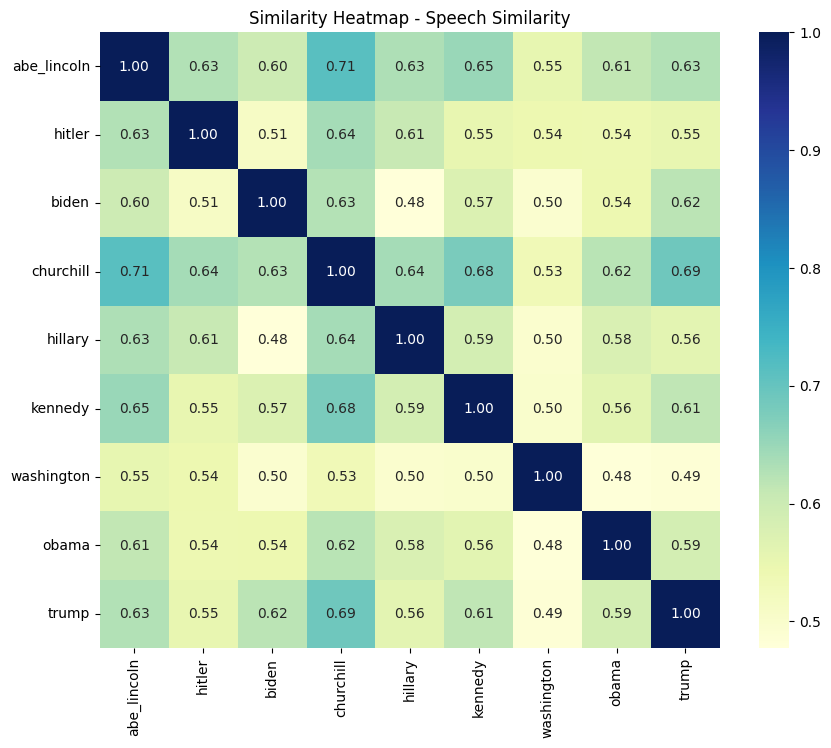

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(speeches_list)
cosine_similarities = cosine_similarity(tfidf_matrix, tfidf_matrix)

# similarity heatmap
def generate_similarity_heatmap(cosine_similarities, title):
    plt.figure(figsize=(10, 8))
    sns.heatmap(cosine_similarities, cmap='YlGnBu', annot=True, fmt=".2f", xticklabels=speech_names, yticklabels=speech_names)
    plt.title(f'Similarity Heatmap - {title}')
    plt.show()

generate_similarity_heatmap(cosine_similarities, 'Speech Similarity')

In [27]:
def analyze_political_figure(file_path, president_name):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Preprocessing
    preprocessed_text = preprocess_text(text)
    tokens = word_tokenize(preprocessed_text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # word cloud
    generate_word_cloud(preprocessed_text, president_name)

    # word and bigram frequency bar chart
    # print(f"Tokens for {president_name}: {tokens}")
    generate_word_frequency_bar_chart(tokens, president_name)
    generate_bigram_bar_chart(tokens, president_name)

    sentiment = perform_sentiment_analysis(preprocessed_text)

    # Sentiment analysis
    sentiment_scores = np.array([perform_sentiment_analysis(sentence) for sentence in preprocessed_text.split('.')])

    # # Visualize sentiment analysis
    # visualize_sentiment(sentiment_scores, president_name)

    print()

    # Named Entity Recognition (NER)
    entities = perform_ner(text)
    # all_entities = ' '.join(entities)
    print(f"Named Entities for {president_name}: {entities}")

    print()

    # Topic modeling using LDA
    topics = perform_lda(preprocessed_text)
    print(f"Topics for {president_name}:")
    for topic in topics:
        print(topic)

In [28]:
def get_sentiment_score(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read()

    # Preprocessing
    preprocessed_text = preprocess_text(text)
    tokens = word_tokenize(preprocessed_text)
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Sentiment analysis
    sentiment = perform_sentiment_analysis(preprocessed_text)

    return sentiment if sentiment is not None else 0  

In [29]:
output_folder = './project_data/gpt3.5-results/'

generated_files = os.listdir(output_folder)

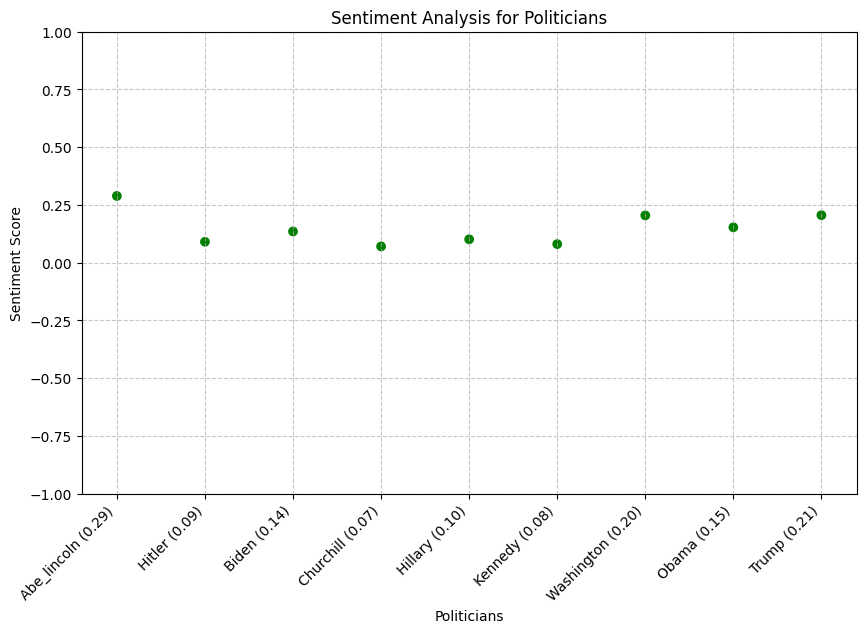

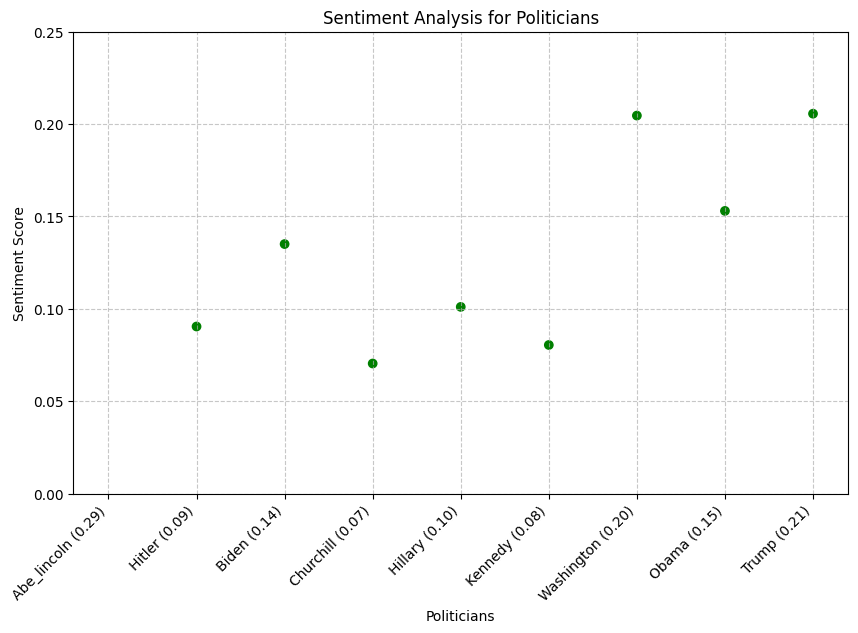

In [33]:
# Original list of politicians
original_politician_labels = ['George Washington','Hillary Clinton','Joe Biden','John F Kennedy Jr.','Winston Churchill', 'Barack Obama', 'Donald Trump', 'Abraham Lincoln', 'Adolf Hitler']

# Reinitialize politician_labels for customization inside the loop
politician_labels = []
politician_sentiments = {}
for file_name in generated_files:
    if file_name.endswith('.txt'):
        president_name = file_name.split('.')[0].capitalize()
        file_path = os.path.join(output_folder, file_name)
        sentiment = get_sentiment_score(file_path)
        politician_sentiments[president_name] = sentiment
        politician_labels.append(f"{president_name} ({sentiment:.2f})")  # Customize labels

politicians = [politician for politician, sentiment in politician_sentiments.items() if sentiment is not None]
sentiments = [sentiment for sentiment in politician_sentiments.values() if sentiment is not None]

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(politicians, sentiments, color=['green' if score >= 0 else 'red' for score in sentiments])

# Customize x-axis labels
plt.xticks(politicians, politician_labels, rotation=45, ha='right')

plt.title('Sentiment Analysis for Politicians')
plt.xlabel('Politicians')
plt.ylabel('Sentiment Score')
plt.ylim(-1, 1)  # Set y-axis range to -1 to 1
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Create a scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(politicians, sentiments, color=['green' if score >= 0 else 'red' for score in sentiments])

# Customize x-axis labels
plt.xticks(politicians, politician_labels, rotation=45, ha='right')

plt.title('Sentiment Analysis for Politicians')
plt.xlabel('Politicians')
plt.ylabel('Sentiment Score')
plt.ylim(0, 0.25)  # Set y-axis range to -1 to 1
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


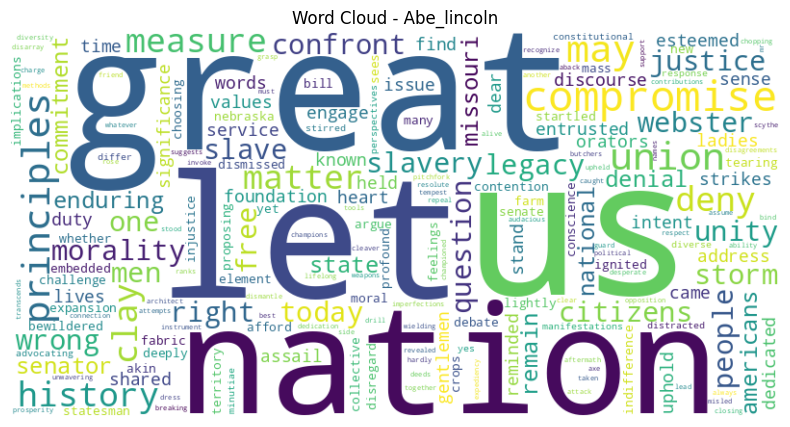

[('us', 7), ('great', 6), ('let', 6), ('principles', 4), ('nation', 4), ('may', 4), ('union', 4), ('compromise', 4), ('matter', 3), ('clay', 3), ('measure', 3), ('history', 3), ('deny', 3), ('citizens', 2), ('today', 2), ('one', 2), ('morality', 2), ('justice', 2), ('wrong', 2), ('men', 2), ('like', 2), ('webster', 2), ('legacy', 2), ('confront', 2), ('slavery', 2), ('storm', 2), ('unity', 2), ('slave', 2), ('free', 2), ('people', 2)]


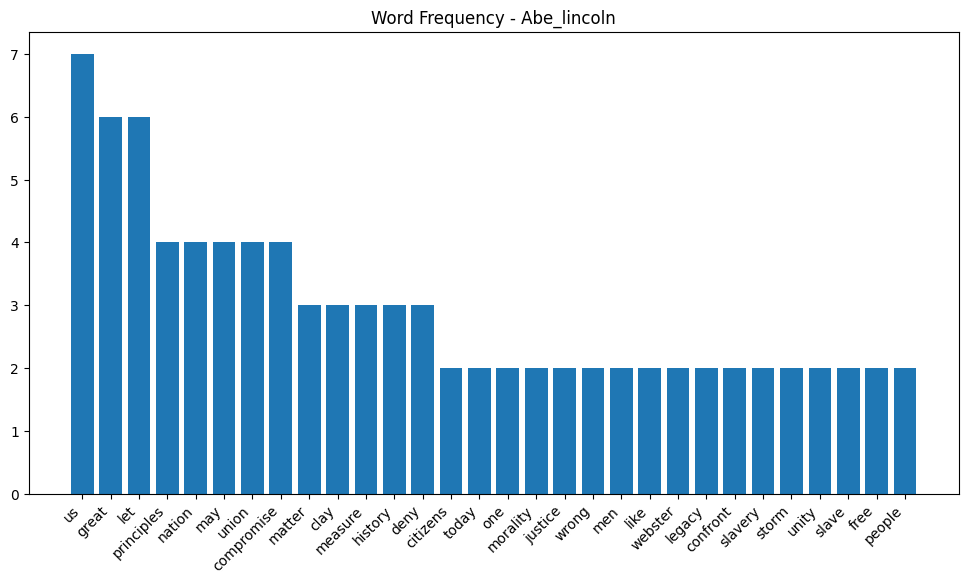

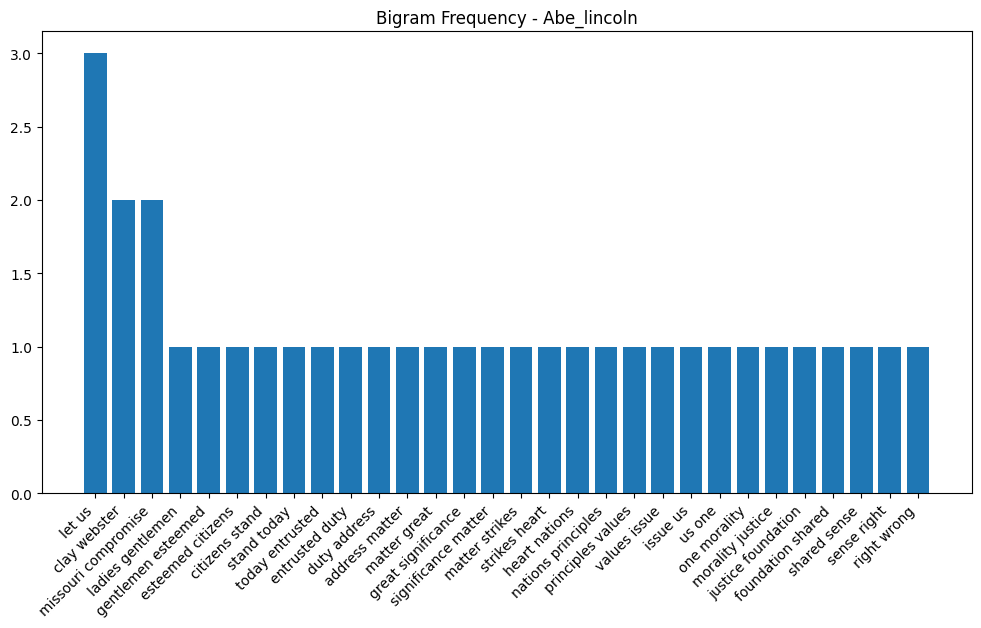


Named Entities for Abe_lincoln: ['today', 'one', 'Clay', 'Webster', 'Nebraska', 'Senate', 'Americans', 'the Missouri Compromise', 'Clay', 'Webster', '1850', 'the Missouri Compromise', 'today', 'Clay', "'50", 'Illinois', 'Washington', 'Americans']

Topics for Abe_lincoln:
(0, '0.015*"great" + 0.014*"us" + 0.014*"let" + 0.011*"compromise" + 0.010*"nation" + 0.009*"may" + 0.009*"principles" + 0.008*"matter" + 0.008*"union" + 0.007*"history"')
(1, '0.013*"let" + 0.013*"us" + 0.013*"great" + 0.010*"union" + 0.008*"principles" + 0.008*"may" + 0.008*"measure" + 0.008*"compromise" + 0.008*"nation" + 0.007*"deny"')
(2, '0.016*"us" + 0.011*"let" + 0.011*"great" + 0.010*"may" + 0.010*"principles" + 0.010*"union" + 0.010*"nation" + 0.009*"compromise" + 0.008*"deny" + 0.008*"clay"')


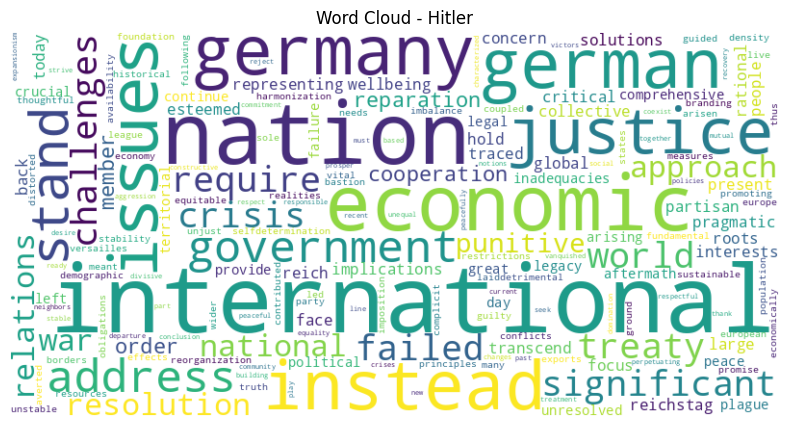

[('international', 6), ('economic', 4), ('german', 3), ('issues', 3), ('instead', 3), ('germany', 3), ('nations', 3), ('justice', 3), ('government', 2), ('address', 2), ('nation', 2), ('also', 2), ('significant', 2), ('challenges', 2), ('world', 2), ('crisis', 2), ('treaty', 2), ('failed', 2), ('resolution', 2), ('war', 2), ('national', 2), ('relations', 2), ('approach', 2), ('punitive', 2), ('cooperation', 2), ('order', 2), ('esteemed', 1), ('members', 1), ('reichstag', 1), ('stand', 1)]


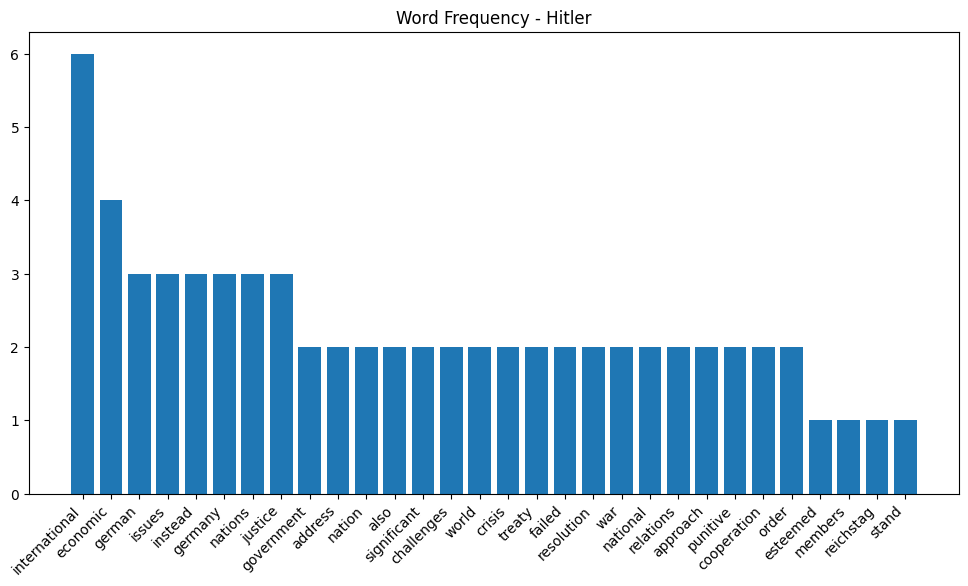

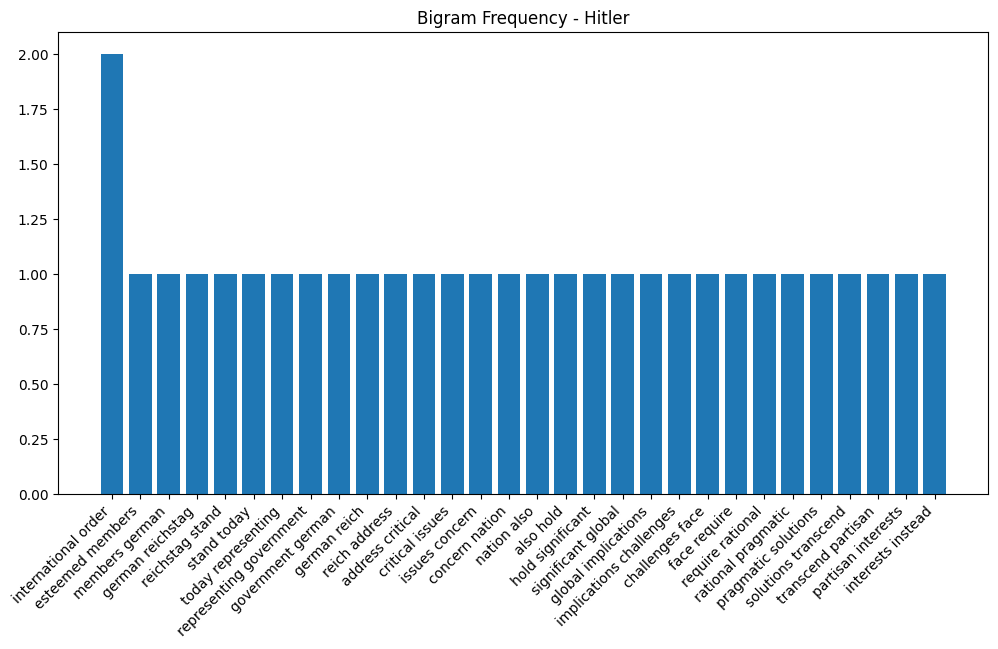


Named Entities for Hitler: ['German', 'today', 'the Peace Treaty', 'the Great War', 'this day', 'European', 'Europe', 'The Treaty of Versailles', 'Germany', 'German', 'The League of Nations', 'Germany', 'Germany']

Topics for Hitler:
(0, '0.015*"international" + 0.011*"economic" + 0.010*"justice" + 0.010*"nations" + 0.010*"instead" + 0.009*"germany" + 0.009*"issues" + 0.009*"german" + 0.008*"crisis" + 0.008*"order"')
(1, '0.017*"international" + 0.012*"economic" + 0.010*"instead" + 0.010*"nations" + 0.009*"justice" + 0.009*"nation" + 0.009*"germany" + 0.009*"national" + 0.008*"german" + 0.008*"issues"')
(2, '0.017*"international" + 0.012*"economic" + 0.011*"issues" + 0.011*"german" + 0.010*"germany" + 0.009*"instead" + 0.009*"punitive" + 0.009*"nations" + 0.009*"justice" + 0.008*"approach"')


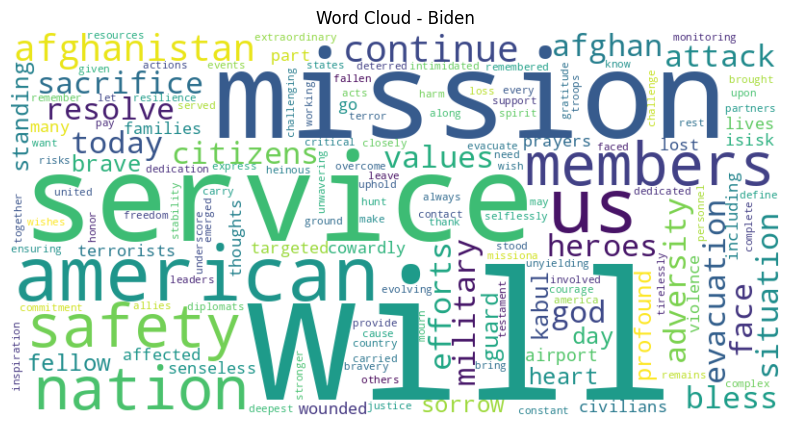

[('service', 4), ('mission', 4), ('us', 4), ('members', 3), ('american', 3), ('nation', 3), ('safety', 3), ('afghanistan', 3), ('continue', 3), ('resolve', 2), ('attack', 2), ('citizens', 2), ('face', 2), ('adversity', 2), ('values', 2), ('heroes', 2), ('situation', 2), ('evacuation', 2), ('efforts', 2), ('military', 2), ('god', 2), ('bless', 2), ('fellow', 1), ('americans', 1), ('today', 1), ('day', 1), ('profound', 1), ('sorrow', 1), ('heart', 1), ('kabul', 1)]


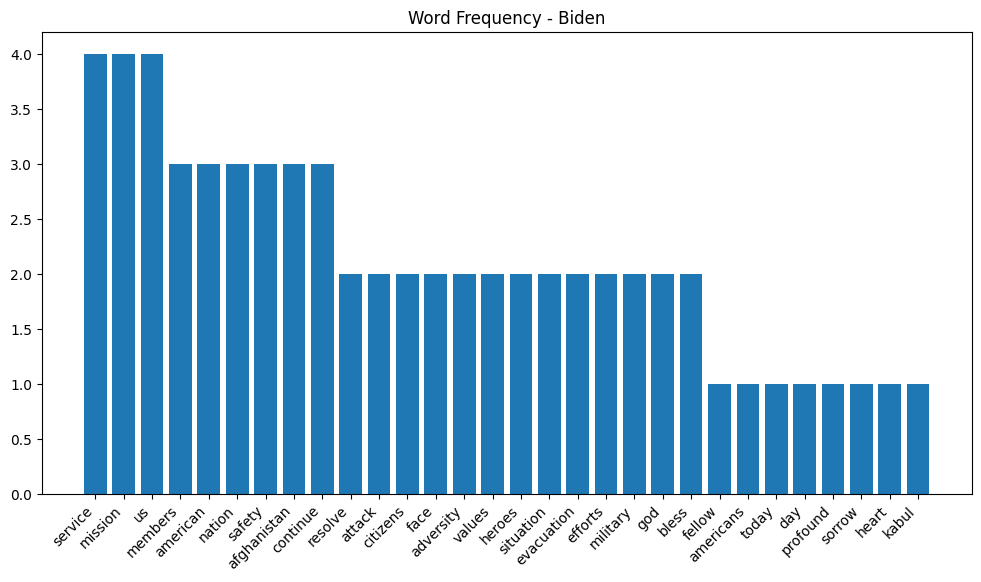

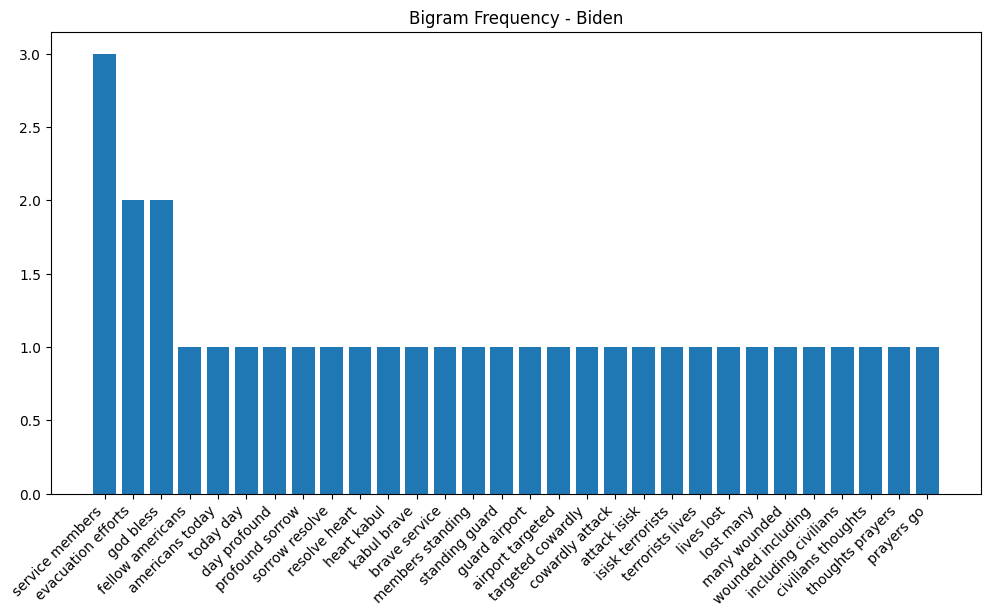


Named Entities for Biden: ['Americans', 'Today', 'a day', 'Kabul', 'ISIS-K', 'American', 'Afghans', 'Afghanistan', 'American', 'Afghan', 'the United States', 'Afghanistan', 'today', 'American', 'God', 'Afghanistan', 'America']

Topics for Biden:
(0, '0.015*"mission" + 0.013*"service" + 0.012*"nation" + 0.011*"us" + 0.011*"members" + 0.011*"american" + 0.011*"continue" + 0.010*"safety" + 0.009*"citizens" + 0.009*"resolve"')
(1, '0.017*"us" + 0.016*"service" + 0.014*"afghanistan" + 0.014*"mission" + 0.012*"members" + 0.012*"safety" + 0.012*"american" + 0.011*"nation" + 0.011*"continue" + 0.009*"values"')
(2, '0.014*"us" + 0.014*"mission" + 0.014*"service" + 0.013*"continue" + 0.012*"safety" + 0.012*"afghanistan" + 0.012*"american" + 0.011*"nation" + 0.011*"members" + 0.010*"bless"')


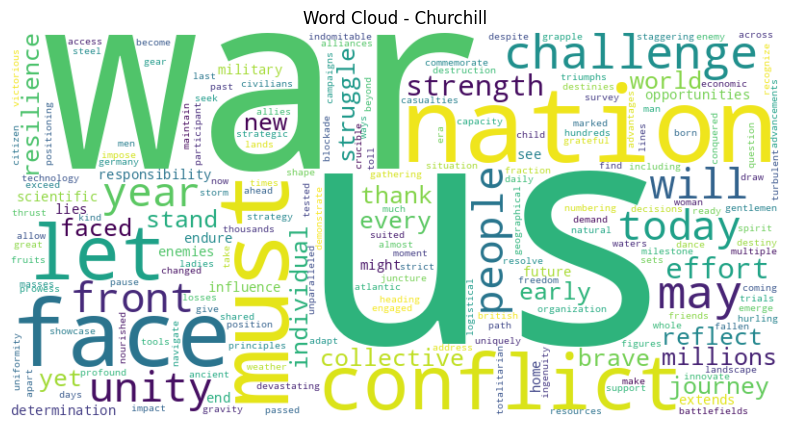

[('us', 11), ('war', 8), ('must', 7), ('face', 6), ('let', 4), ('nation', 4), ('conflict', 4), ('nations', 4), ('may', 4), ('today', 3), ('challenges', 3), ('unity', 3), ('people', 3), ('strength', 3), ('thank', 2), ('reflect', 2), ('year', 2), ('journey', 2), ('since', 2), ('world', 2), ('stand', 2), ('faced', 2), ('collective', 2), ('resilience', 2), ('millions', 2), ('brave', 2), ('new', 2), ('early', 2), ('yet', 2), ('every', 2)]


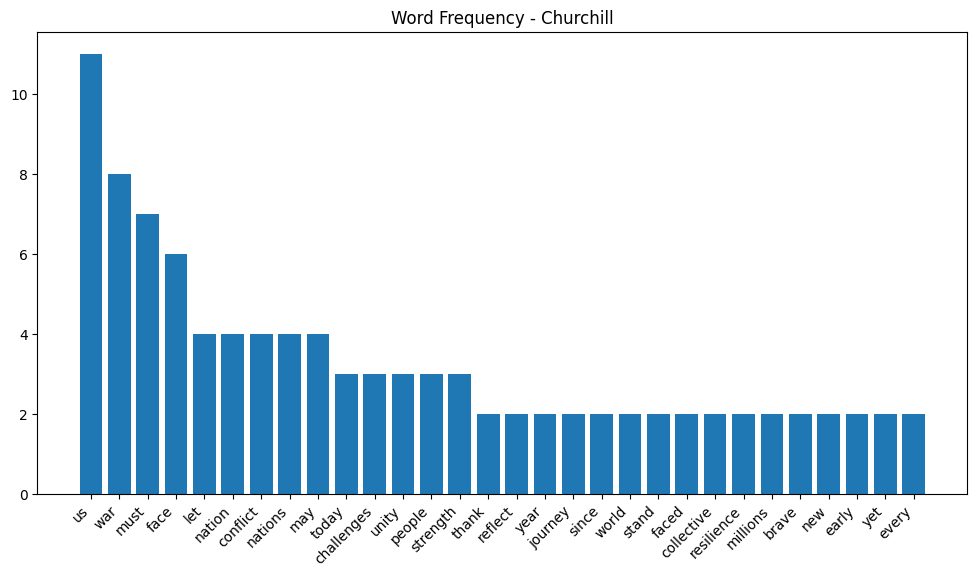

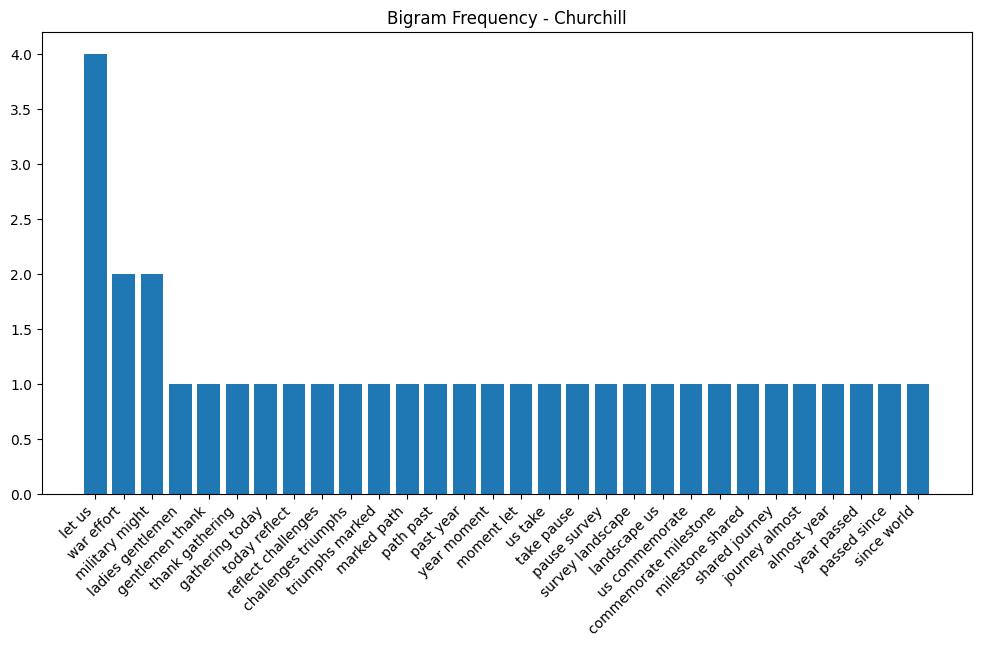


Named Entities for Churchill: ['today', 'the past year', 'Almost a year', 'Atlantic', 'millions', 'Today', 'the early days', 'the Great War', 'British', 'hundreds of thousands', 'Today', 'the coming years', 'daily', 'us', 'Germany', 'a matter of weeks', 'millions', 'hours', 'the United Kingdom', 'Queen']

Topics for Churchill:
(0, '0.018*"us" + 0.014*"war" + 0.013*"must" + 0.009*"face" + 0.008*"nation" + 0.008*"let" + 0.007*"nations" + 0.007*"may" + 0.007*"conflict" + 0.007*"people"')
(1, '0.021*"us" + 0.018*"war" + 0.014*"face" + 0.013*"must" + 0.009*"nations" + 0.009*"conflict" + 0.008*"may" + 0.008*"nation" + 0.007*"let" + 0.007*"challenges"')
(2, '0.018*"us" + 0.012*"must" + 0.010*"war" + 0.009*"let" + 0.009*"face" + 0.008*"may" + 0.008*"conflict" + 0.007*"nations" + 0.007*"nation" + 0.007*"today"')


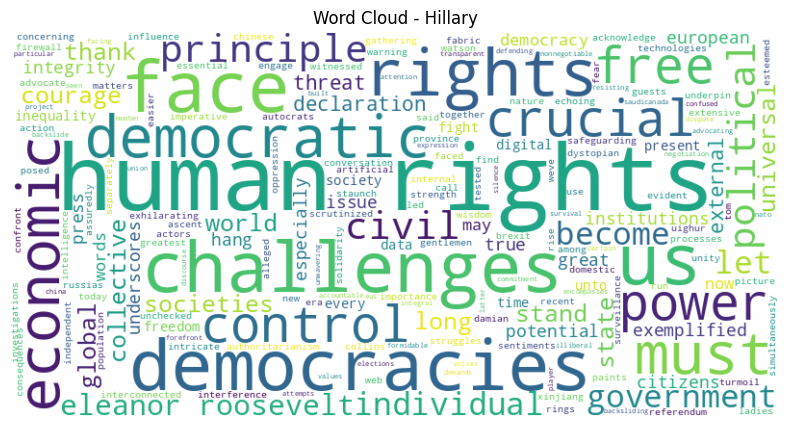

[('rights', 16), ('human', 11), ('challenges', 6), ('democracies', 6), ('us', 6), ('face', 5), ('democratic', 4), ('must', 4), ('economic', 4), ('crucial', 3), ('eleanor', 3), ('control', 3), ('power', 3), ('free', 3), ('civil', 3), ('political', 3), ('let', 3), ('thank', 2), ('world', 2), ('collective', 2), ('stand', 2), ('courage', 2), ('long', 2), ('global', 2), ('societies', 2), ('principles', 2), ('universal', 2), ('declaration', 2), ('external', 2), ('exemplified', 2)]


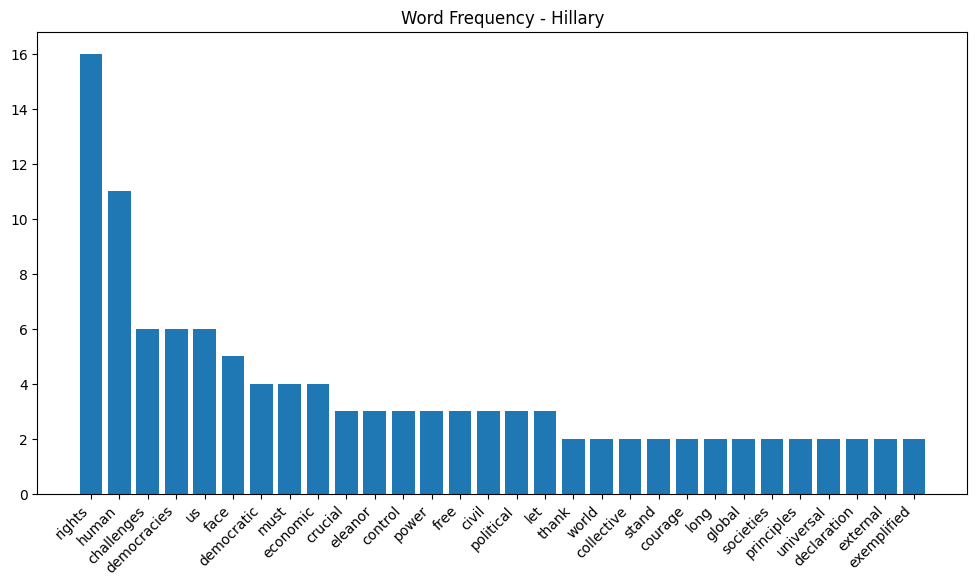

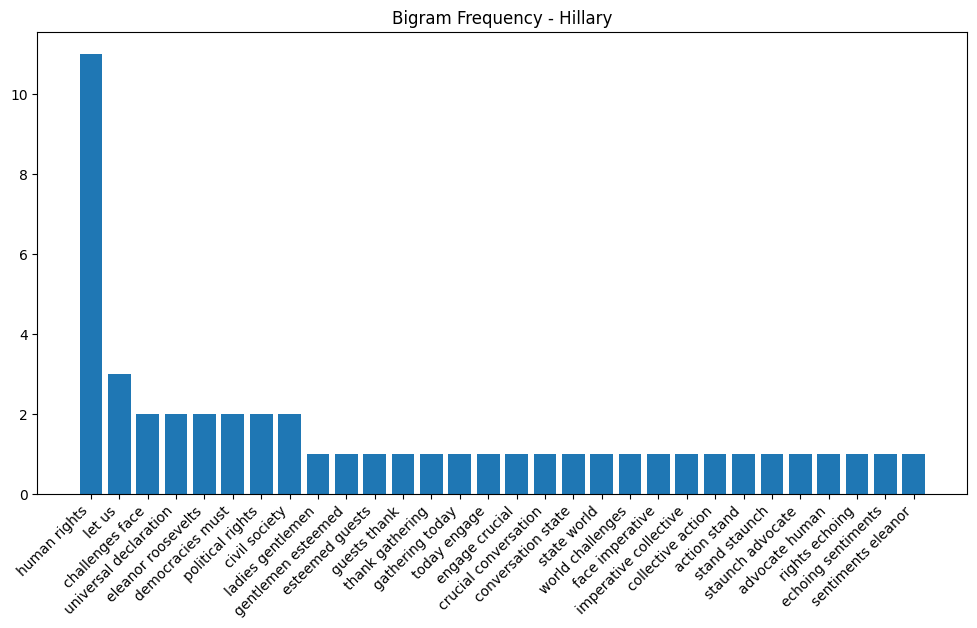


Named Entities for Hillary: ['today', 'Eleanor Roosevelt', 'Courage', 'the Universal Declaration of Human Rights', 'Russia', 'Brexit', 'Damian Collins', 'Tom Watson', 'Chinese', 'the "Great Firewall', 'Uighur', 'Xinjiang Province', "Eleanor Roosevelt's", 'Saudi', 'Canada', 'China', 'The European Union', 'democratic', 'EU', 'European', 'NATO', 'the Universal Declaration', "Martin Luther King's", 'the hour', 'American', 'three', 'Digital', 'Google', 'The Helsinki Accords', 'Eleanor Roosevelt']

Topics for Hillary:
(0, '0.017*"rights" + 0.010*"human" + 0.008*"challenges" + 0.008*"us" + 0.006*"face" + 0.006*"economic" + 0.006*"democracies" + 0.005*"control" + 0.005*"democratic" + 0.005*"must"')
(1, '0.024*"rights" + 0.015*"human" + 0.010*"us" + 0.010*"challenges" + 0.009*"democracies" + 0.007*"must" + 0.007*"face" + 0.006*"democratic" + 0.006*"economic" + 0.006*"let"')
(2, '0.019*"rights" + 0.017*"human" + 0.010*"democracies" + 0.008*"face" + 0.007*"us" + 0.007*"challenges" + 0.007*"democ

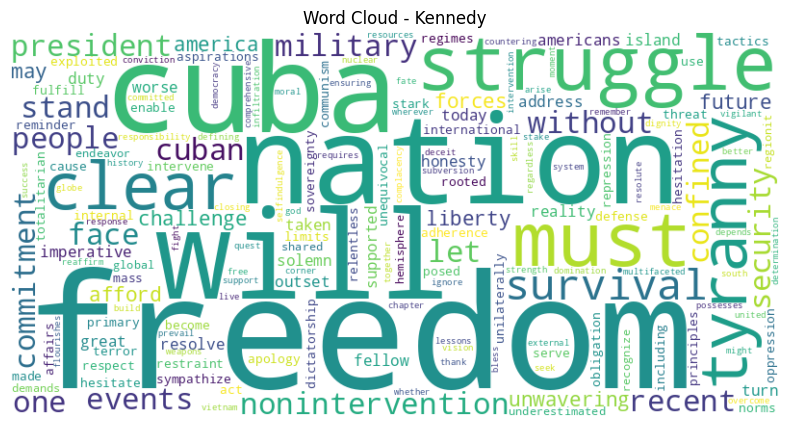

[('freedom', 9), ('cuba', 5), ('nation', 4), ('struggle', 4), ('must', 4), ('clear', 3), ('tyranny', 3), ('survival', 3), ('president', 2), ('stand', 2), ('recent', 2), ('events', 2), ('face', 2), ('cuban', 2), ('people', 2), ('military', 2), ('commitment', 2), ('nonintervention', 2), ('let', 2), ('without', 2), ('security', 2), ('confined', 2), ('one', 2), ('unwavering', 2), ('afford', 2), ('may', 2), ('forces', 2), ('future', 2), ('liberty', 2), ('fellow', 1)]


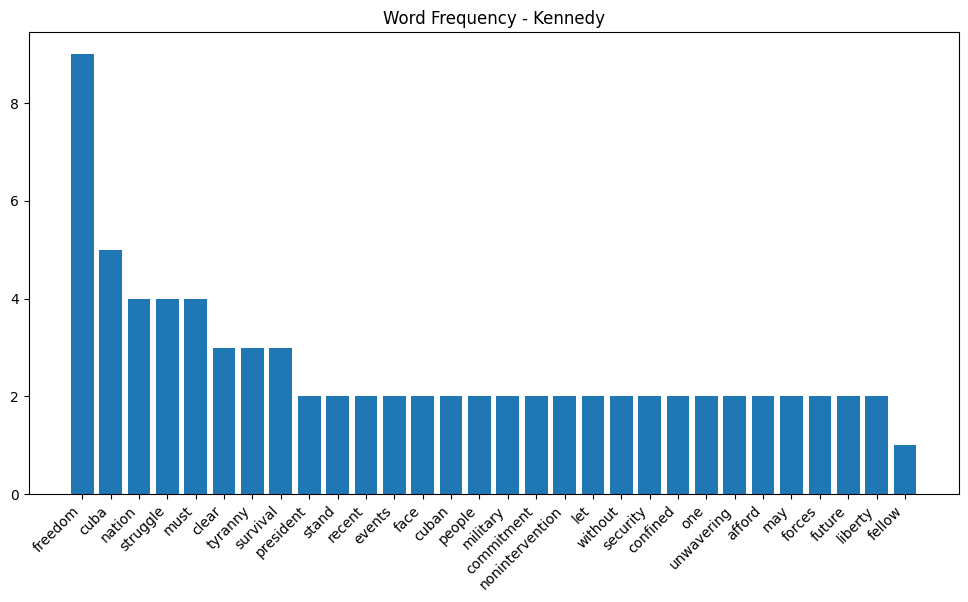

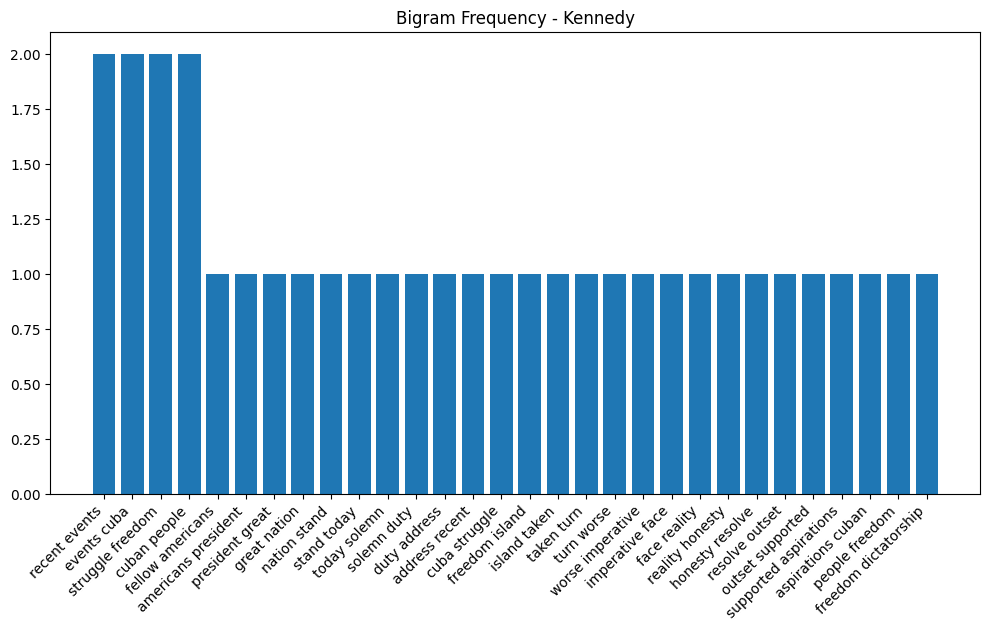


Named Entities for Kennedy: ['Americans', 'today', 'Cuba', 'Cuban', 'Cuba', 'one', 'one', 'Cuba', 'Americas', 'Cuba', 'South Vietnam', 'Cuba', 'Cuban', 'God', 'America']

Topics for Kennedy:
(0, '0.010*"freedom" + 0.008*"must" + 0.008*"cuba" + 0.007*"tyranny" + 0.007*"nation" + 0.007*"survival" + 0.007*"struggle" + 0.007*"unwavering" + 0.007*"afford" + 0.006*"military"')
(1, '0.032*"freedom" + 0.021*"cuba" + 0.014*"must" + 0.014*"struggle" + 0.012*"nation" + 0.012*"survival" + 0.010*"clear" + 0.010*"tyranny" + 0.009*"stand" + 0.009*"confined"')
(2, '0.023*"freedom" + 0.015*"nation" + 0.013*"struggle" + 0.012*"must" + 0.011*"tyranny" + 0.011*"clear" + 0.011*"cuba" + 0.009*"survival" + 0.009*"events" + 0.009*"liberty"')


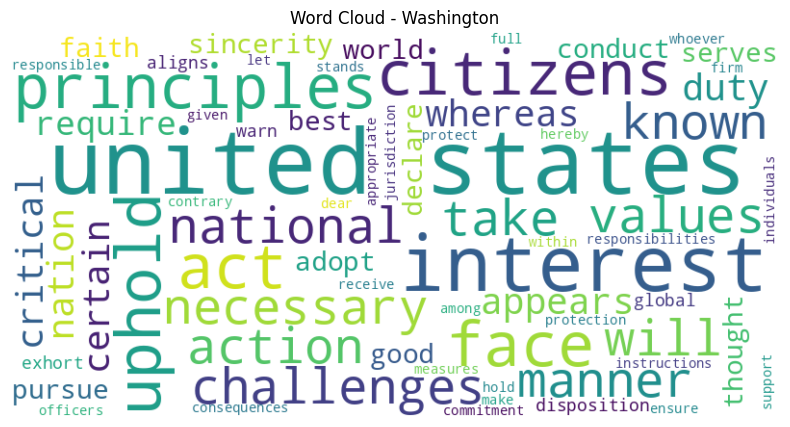

[('united', 7), ('states', 7), ('face', 3), ('interest', 3), ('citizens', 3), ('principles', 3), ('act', 3), ('challenges', 2), ('values', 2), ('interests', 2), ('necessary', 2), ('uphold', 2), ('manner', 2), ('national', 2), ('known', 2), ('take', 2), ('whereas', 1), ('appears', 1), ('certain', 1), ('critical', 1), ('nation', 1), ('duty', 1), ('require', 1), ('sincerity', 1), ('good', 1), ('faith', 1), ('adopt', 1), ('pursue', 1), ('conduct', 1), ('upholds', 1)]


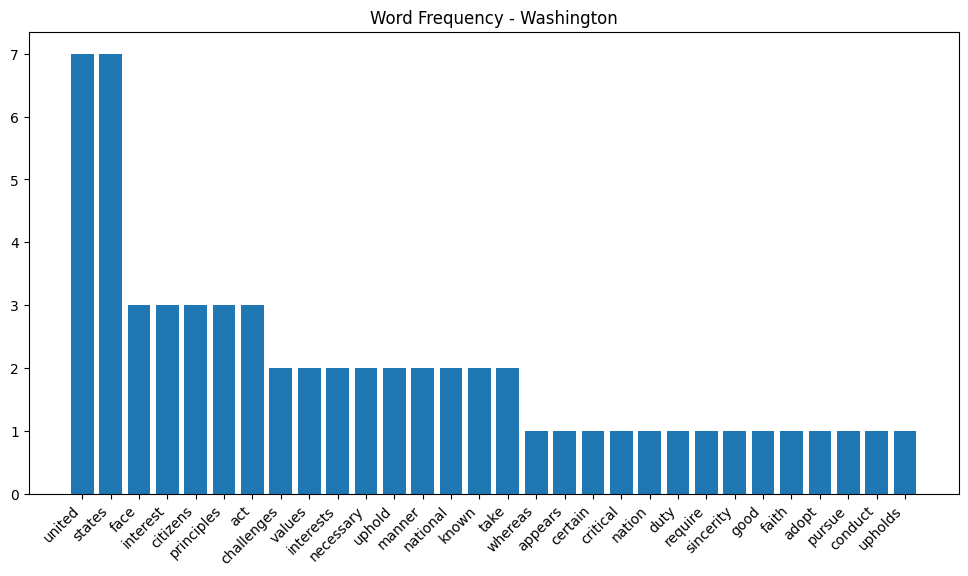

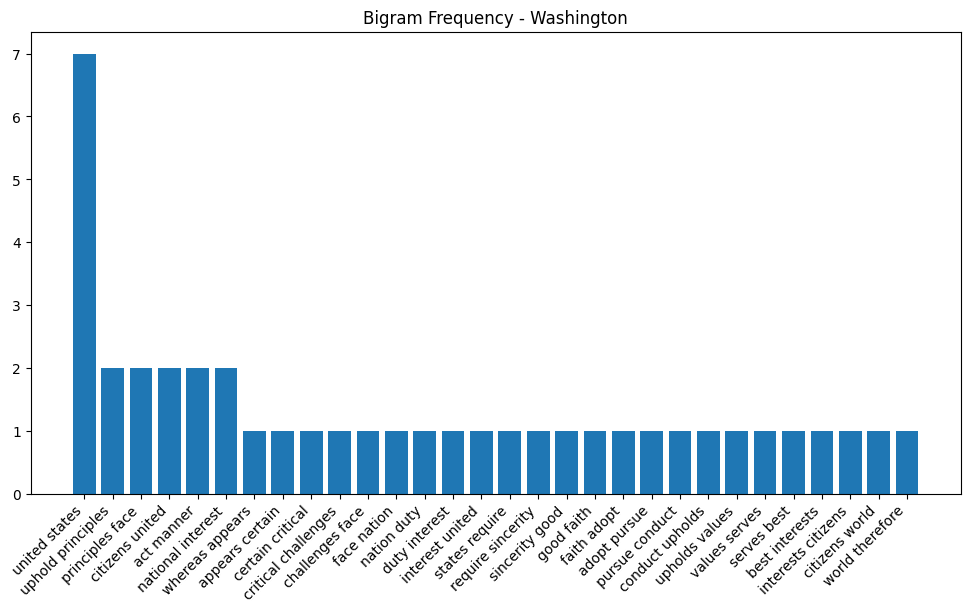


Named Entities for Washington: ['the United States', 'the United States', 'the United States', 'the United States', 'the United States', 'the United States', 'the United States']

Topics for Washington:
(0, '0.042*"united" + 0.040*"states" + 0.027*"face" + 0.023*"principles" + 0.022*"act" + 0.020*"citizens" + 0.020*"interest" + 0.019*"take" + 0.018*"known" + 0.018*"interests"')
(1, '0.053*"united" + 0.049*"states" + 0.026*"interest" + 0.025*"act" + 0.025*"citizens" + 0.024*"principles" + 0.021*"face" + 0.019*"national" + 0.019*"challenges" + 0.019*"manner"')
(2, '0.044*"states" + 0.035*"united" + 0.021*"citizens" + 0.021*"face" + 0.021*"principles" + 0.019*"interest" + 0.019*"act" + 0.018*"interests" + 0.017*"necessary" + 0.017*"values"')


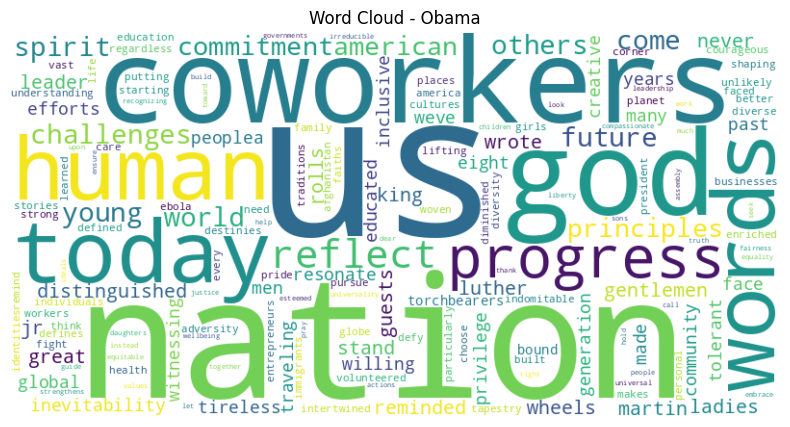

[('us', 6), ('coworkers', 3), ('god', 3), ('today', 2), ('words', 2), ('human', 2), ('progress', 2), ('reflect', 2), ('challenges', 2), ('nations', 2), ('spirit', 2), ('young', 2), ('future', 2), ('world', 2), ('like', 2), ('nation', 2), ('others', 2), ('principles', 2), ('commitment', 2), ('ladies', 1), ('gentlemen', 1), ('distinguished', 1), ('guests', 1), ('stand', 1), ('reminded', 1), ('great', 1), ('leader', 1), ('martin', 1), ('luther', 1), ('king', 1)]


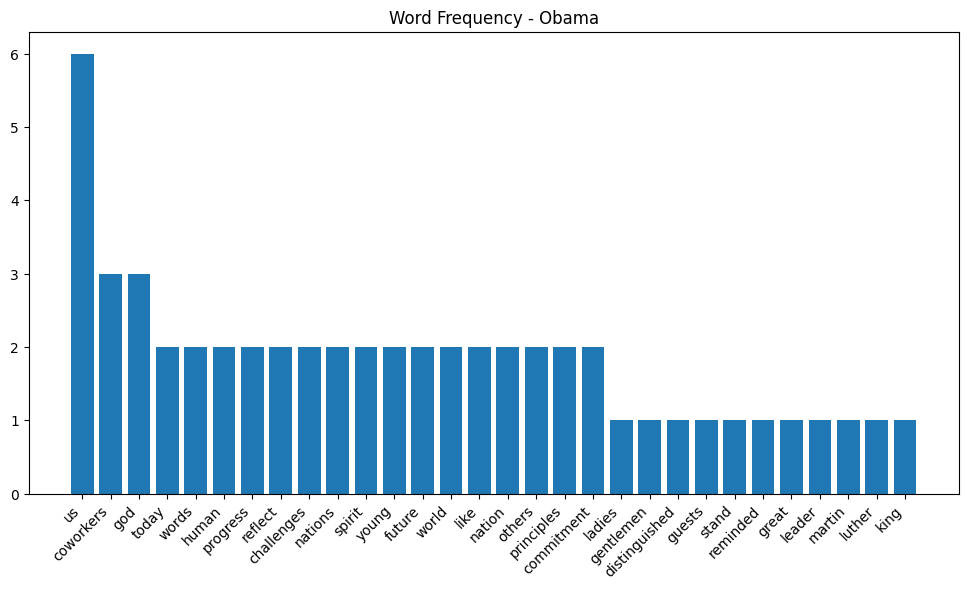

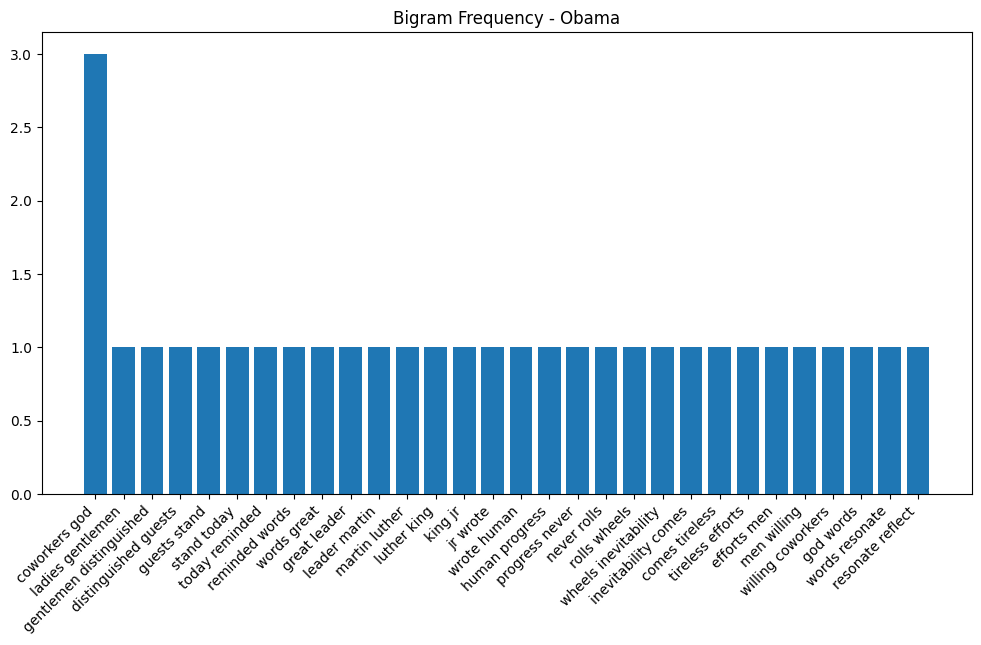


Named Entities for Obama: ['today', 'Martin Luther King', 'the past eight years', 'Afghanistan', 'America', 'Americans', 'Today', 'American']

Topics for Obama:
(0, '0.017*"us" + 0.011*"coworkers" + 0.010*"god" + 0.010*"nation" + 0.010*"world" + 0.009*"words" + 0.009*"future" + 0.009*"principles" + 0.008*"young" + 0.008*"like"')
(1, '0.021*"us" + 0.013*"god" + 0.012*"coworkers" + 0.009*"today" + 0.009*"challenges" + 0.009*"human" + 0.008*"others" + 0.008*"progress" + 0.008*"spirit" + 0.008*"young"')
(2, '0.018*"us" + 0.010*"coworkers" + 0.010*"god" + 0.009*"commitment" + 0.009*"challenges" + 0.008*"reflect" + 0.008*"spirit" + 0.008*"others" + 0.008*"human" + 0.008*"future"')


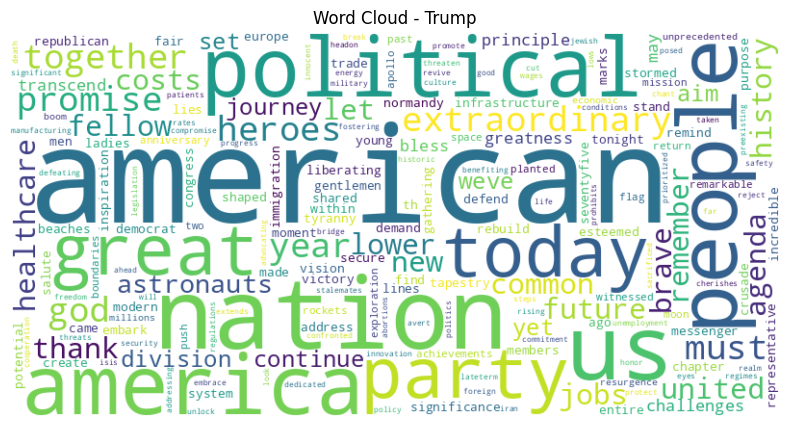

[('american', 10), ('nation', 6), ('us', 5), ('political', 4), ('people', 4), ('americans', 3), ('today', 3), ('great', 3), ('party', 3), ('extraordinary', 3), ('together', 3), ('heroes', 3), ('must', 3), ('america', 3), ('god', 3), ('fellow', 2), ('thank', 2), ('united', 2), ('common', 2), ('future', 2), ('new', 2), ('let', 2), ('remember', 2), ('agenda', 2), ('jobs', 2), ('lower', 2), ('healthcare', 2), ('costs', 2), ('history', 2), ('years', 2)]


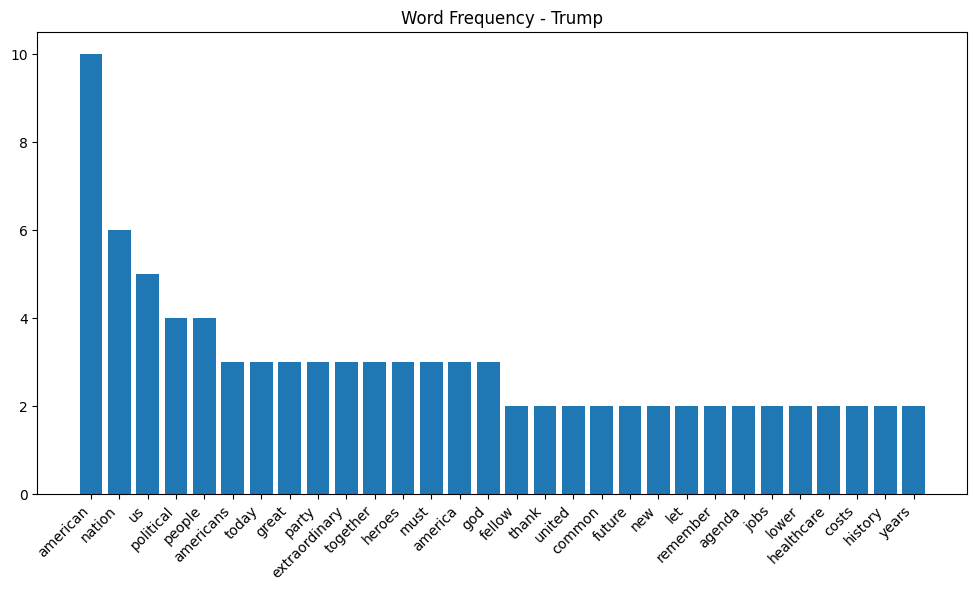

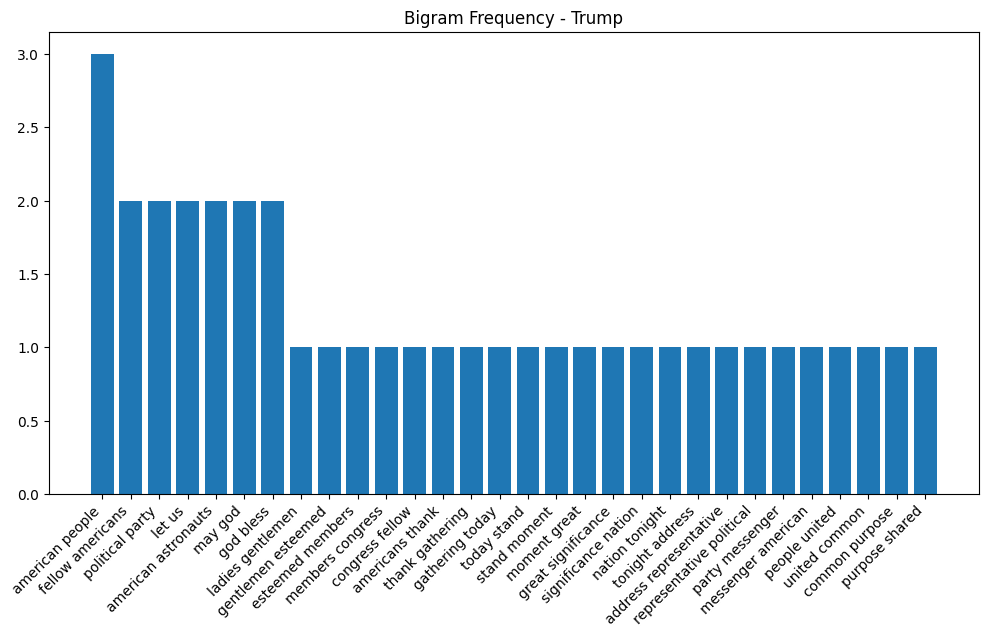


Named Entities for Trump: ['Congress', 'Americans', 'today', 'Tonight', 'American', 'Republican', 'Democrat', 'American', 'American', 'American', 'Seventy-five years ago', 'Europe', 'Today', 'This year', '50th', 'Apollo 11', 'American', 'the moon', 'American', 'American', 'the past two years', 'millions', 'Americans', 'American', 'America', 'ISIS', 'Iran', 'American', 'America', 'Jewish', 'D-Day', 'today', 'the Middle East', 'Afghanistan', 'Afghan', 'Taliban', 'American', 'Americans', 'America', 'first', 'One', 'God', 'God', 'the United States of America']

Topics for Trump:
(0, '0.018*"american" + 0.011*"nation" + 0.009*"us" + 0.007*"god" + 0.007*"extraordinary" + 0.007*"together" + 0.007*"americans" + 0.007*"america" + 0.006*"people" + 0.006*"political"')
(1, '0.016*"american" + 0.011*"nation" + 0.010*"us" + 0.010*"people" + 0.008*"political" + 0.007*"great" + 0.007*"extraordinary" + 0.007*"americans" + 0.007*"heroes" + 0.007*"must"')
(2, '0.020*"american" + 0.012*"nation" + 0.010*"

In [34]:
for file_name in generated_files:
    if file_name.endswith('.txt'):
        president_name = file_name.split('.')[0].capitalize()
        file_path = os.path.join(output_folder, file_name)
        analyze_political_figure(file_path, president_name)
        